In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
#session.query(func.count(Dow.date)).all()

session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

Query Date:  2016-08-23


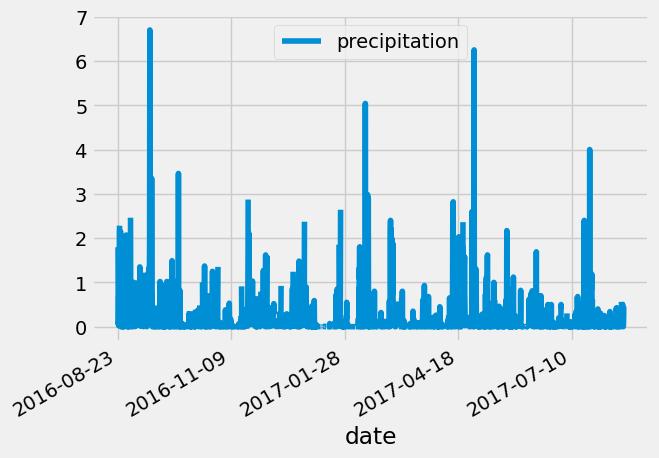

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)



# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores

#measurement info
#id INTEGER
#station TEXT
#date TEXT
#prcp FLOAT
#tobs FLOAT
#q=[Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]
q=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_info_df=pd.DataFrame(q)

#print(date_info_df)

# Sort the dataframe by date
date_sorted=date_info_df.sort_values("date")
date_sorted

# Use Pandas Plotting with Matplotlib to plot the data

#label axes etc
date_sorted.plot.line(x='date', y='prcp', label='precipitation')
plt.gcf().autofmt_xdate()
plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
#station info:
#id INTEGER
#station TEXT
#name TEXT
#latitude FLOAT
#longitude FLOAT
#elevation FLOAT

#q=session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date > query_date).all()
q2=session.query(Station.id).count()
q2



9

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#q3=session.query(Measurement.station, count_distinct(Measurement.station))
#q3
q3=engine.execute(text('SELECT station, COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC')).fetchall()
q3

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#most active station = 'USC00519281'


q4=engine.execute(text('SELECT tobs FROM measurement WHERE station ="USC00519281"')).fetchall()
q4

min_temp=np.min(q4)
min_temp

max_temp=np.max(q4)
max_temp

avg_temp=np.mean(q4)
avg_temp

[(min_temp, max_temp, avg_temp)]


[(54.0, 85.0, 71.66378066378067)]

[77.0, 77.0, 80.0, 80.0, 75.0, 73.0, 78.0, 77.0, 78.0, 80.0, 80.0, 78.0, 78.0, 78.0, 73.0, 74.0, 80.0, 79.0, 77.0, 80.0, 76.0, 79.0, 75.0, 79.0, 78.0, 79.0, 78.0, 78.0, 76.0, 74.0, 77.0, 78.0, 79.0, 79.0, 77.0, 80.0, 78.0, 78.0, 78.0, 77.0, 79.0, 79.0, 79.0, 79.0, 75.0, 76.0, 73.0, 72.0, 71.0, 77.0, 79.0, 78.0, 79.0, 77.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 77.0, 74.0, 75.0, 76.0, 73.0, 76.0, 74.0, 77.0, 76.0, 76.0, 74.0, 75.0, 75.0, 75.0, 75.0, 71.0, 63.0, 70.0, 68.0, 67.0, 77.0, 74.0, 77.0, 76.0, 76.0, 75.0, 76.0, 75.0, 73.0, 75.0, 73.0, 75.0, 74.0, 75.0, 74.0, 75.0, 73.0, 75.0, 73.0, 73.0, 74.0, 70.0, 72.0, 70.0, 67.0, 67.0, 69.0, 70.0, 68.0, 69.0, 69.0, 66.0, 65.0, 68.0, 62.0, 75.0, 70.0, 69.0, 76.0, 76.0, 74.0, 73.0, 71.0, 74.0, 74.0, 72.0, 71.0, 72.0, 74.0, 69.0, 67.0, 72.0, 70.0, 64.0, 63.0, 63.0, 62.0, 70.0, 70.0, 62.0, 62.0, 63.0, 65.0, 69.0, 77.0, 70.0, 74.0, 69.0, 72.0, 71.0, 69.0, 71.0, 71.0, 72.0, 72.0, 69.0, 70.0, 66.0, 65.0, 69.0, 68.0, 68.0, 68.0, 59.0, 60.0, 70.0, 73.

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 53., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

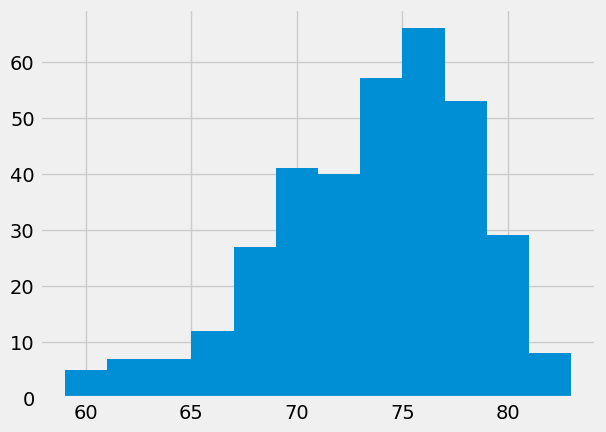

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Query Date:  2016-08-23
q5=engine.execute(text('SELECT tobs FROM measurement WHERE station ="USC00519281"  AND date >= "2016-08-23" ' )).fetchall()
q5

#q6=q5.split(",")

test=[]
for item in q5:
    a1=str(item).replace(",", "")
    a2= a1.replace('(', '').replace(')', '')
    test.append(float(a2))
print(test)

plt.hist(test, bins=12)

# Close Session

In [34]:
# Close Session
session.close()